In [1]:
import matplotlib.style
import matplotlib as mpl
#Changing the style of the plot
mpl.style.use('seaborn')
import matplotlib.pyplot as plt
import os, sys, wave, struct

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

from copy import deepcopy
from math import ceil

from utils import *

from transformation import phase_vocoder, HPS_TSM
from analysis import analysis
from synthesis import synthesis

In [2]:
def save_plot_read(inv_s, path):
    # Write the .wav file
    wavfile.write(path, Fs, np.int16(np.around(inv_s)))
    #Playing the sound
    wf =wavfile.read(path)


    timestep = 1/float(Fs)
    times = np.arange(len(inv_s))*timestep
    plot_sound(inv_s, times)

    display(Audio(wf[1],rate=wf[0]))    

_wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=151671, comptype='NONE', compname='not compressed')


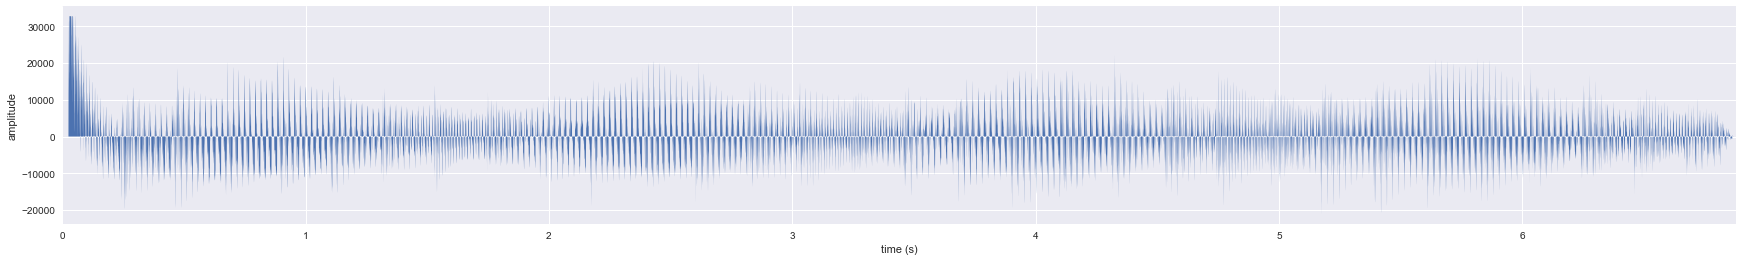

In [90]:
data_path = os.getcwd()
filename = 'SynthPoly.wav'#"sunny-original.wav"
sub_part = 'SynthPoly'
sound = os.path.join(data_path, filename) 

wavefile = load_sound(sound)
print(wavefile.getparams())

Fs = int(wavefile.getframerate()) #frames per second
num_samples = int(wavefile.getnframes()) #nb_frames
data = wavefile.readframes(num_samples)
data = struct.unpack('{n}h'.format(n=num_samples), data)
s = np.array(data).astype(float)


timestep = 1/float(Fs)
times = np.arange(len(s))*timestep
plot_sound(s, times)


#Playing the sound
wf =wavfile.read(sound)
Audio(wf[1],rate=wf[0])

In [101]:

if filename == "aeiou.wav":
    hop_analysis = 64
    win_length = int(0.1*Fs)#512

    n_fft = win_length
    hop_synthesis = 48#hop_analysis
else:
    hop_analysis = 128
    win_length = int(0.1*Fs)#1024

    n_fft = win_length
    hop_synthesis = 128 #(3/2)#hop_analysis
print('alpha =',str(hop_synthesis/hop_analysis))
print("nfft = win_length =", win_length )
alpha = hop_synthesis/hop_analysis
#OLA
#Hann Window and Hs should be N/2 (so Ha = int(Hs/alpha))

alpha = 1.0
nfft = win_length = 2205


In [102]:
win_length = int(0.1*Fs)#512

n_fft = win_length
#hop_synthesis = win_length//2#hop_analysis

#hop_analysis = int(hop_synthesis/0.75)
print("hop_analysis", hop_analysis)

hop_analysis 128


In [103]:
stft = analysis(s, hop_analysis, win_length = win_length)


C:\Users\yoach\AppData\Local\Temp/ipykernel_18252/2265625880.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img, ax=ax, format="%+2.0f dB")


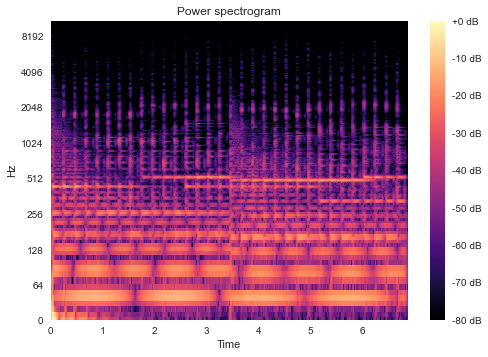

In [104]:
import matplotlib.pyplot as plt
import librosa.display

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(stft,
                                                       ref=np.max),
                               sr = Fs, hop_length = hop_analysis,
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [105]:
beta = 2/3 + hop_synthesis/(hop_analysis*3)
beta = 1#hop_synthesis/hop_analysis

phase_lock = "rigid_scale"
init_alpha = False




### HPS

In [106]:
time_length = 100
freq_length = time_length//4
beta = 1

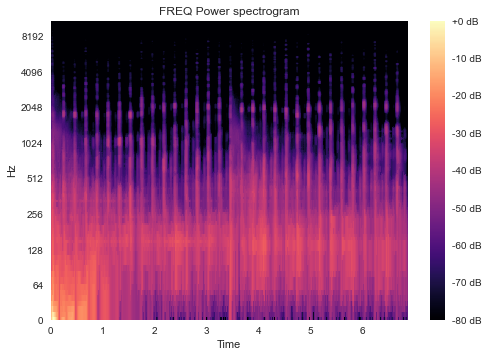

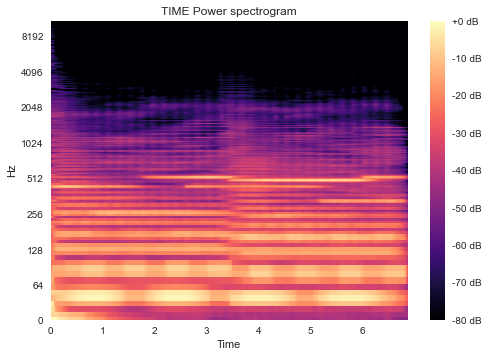

In [107]:
inv_s, x_percussive, x_harmonic = HPS_TSM(stft, Fs, win_length, hop_synthesis, hop_analysis, time_length, freq_length, True,
    phase_lock = "rigid_identity", init_alpha = False, beta = beta)

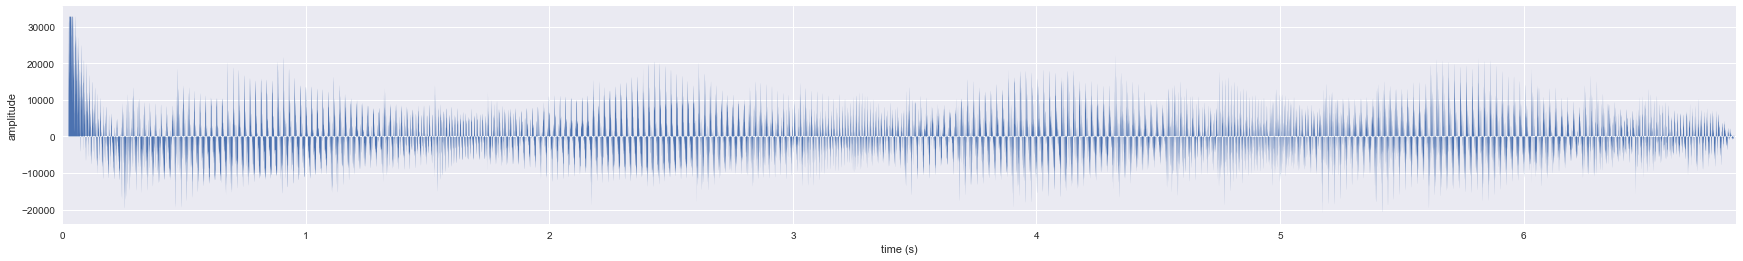

In [108]:
new_path = sub_part+'_'+str(alpha)+'_HPS.wav'
save_plot_read(inv_s, new_path)

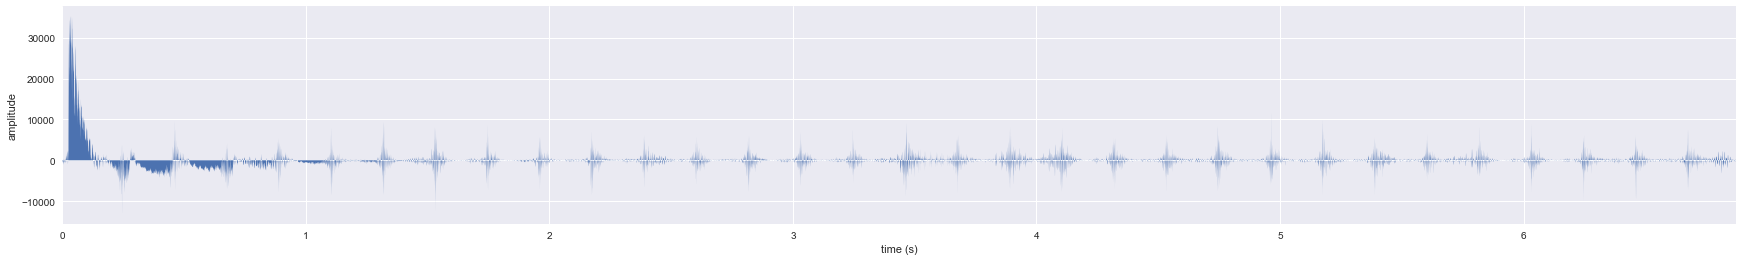

In [109]:
new_path = sub_part+'_'+str(alpha)+'_percussive_HPS.wav'
save_plot_read(x_percussive, new_path)

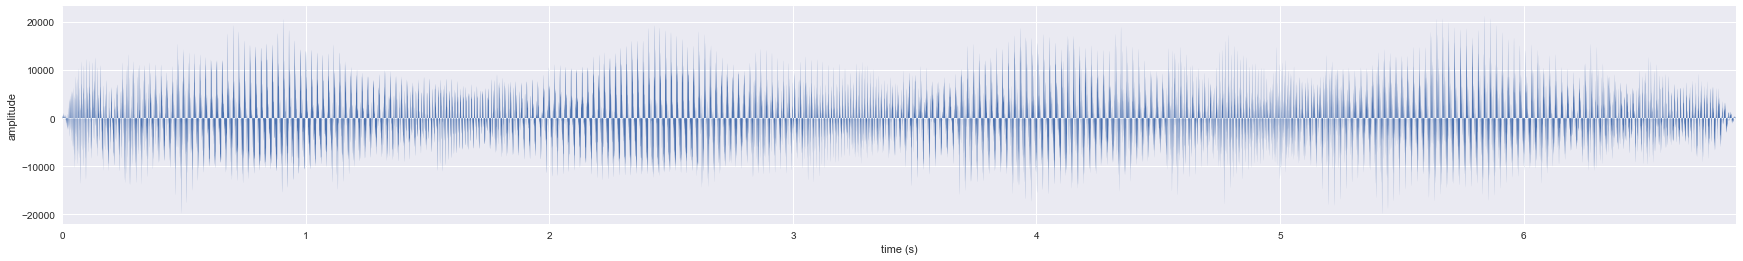

In [110]:
new_path = sub_part+'_'+str(alpha)+'_harmonic_HPS.wav'
save_plot_read(x_harmonic, new_path)

### PV-TSM

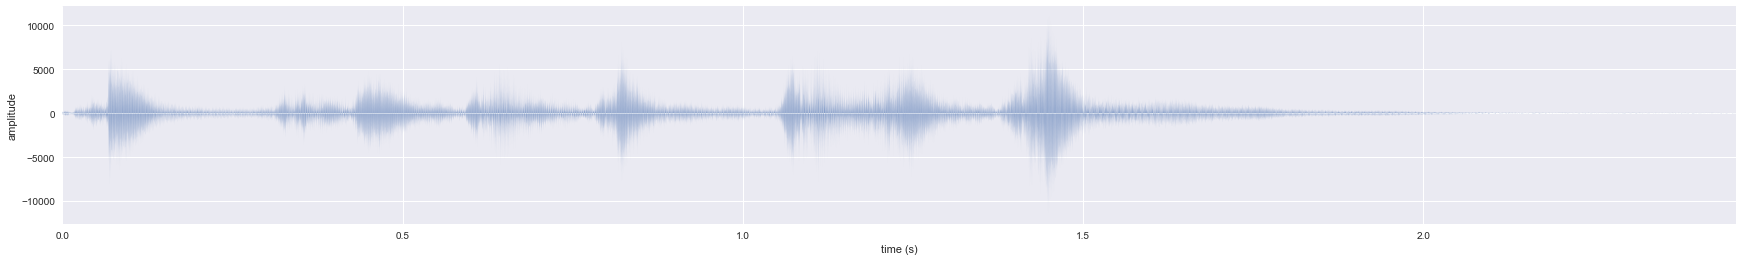

In [80]:
new_stft = phase_vocoder(stft, Fs, hop_synthesis, hop_analysis, phase_lock = "classic", init_alpha = False, beta = beta)

new_path = sub_part+'_'+str(alpha)+'_PVTSM_classic.wav'


inv_s = synthesis(new_stft, hop_synthesis = hop_synthesis, win_length = win_length)
save_plot_read(inv_s, new_path)



In [81]:
#librosa.istft(new_stft, hop_length = hop_synthesis, center = True).shape, s.shape, n_fft, 2 * (new_stft.shape[-2] - 1)

#### with alpha

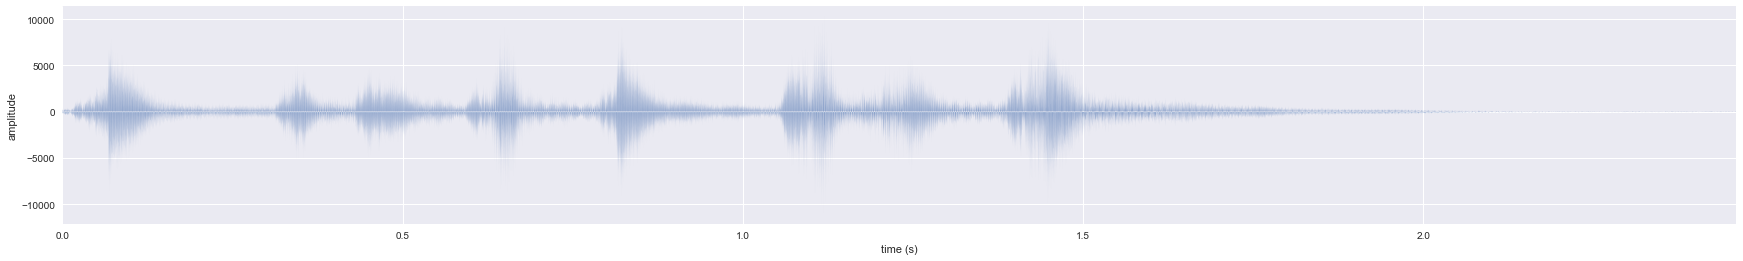

In [82]:
new_stft = phase_vocoder(stft, Fs, hop_synthesis, hop_analysis, phase_lock = "classic", init_alpha = True, beta = beta)

new_path = sub_part+'_'+str(alpha)+'_alphaInit_PVTSM_classic.wav'


inv_s = synthesis(new_stft, hop_synthesis = hop_synthesis, win_length = win_length)
save_plot_read(inv_s, new_path)


### PV-TSM LOOSE PL

loose


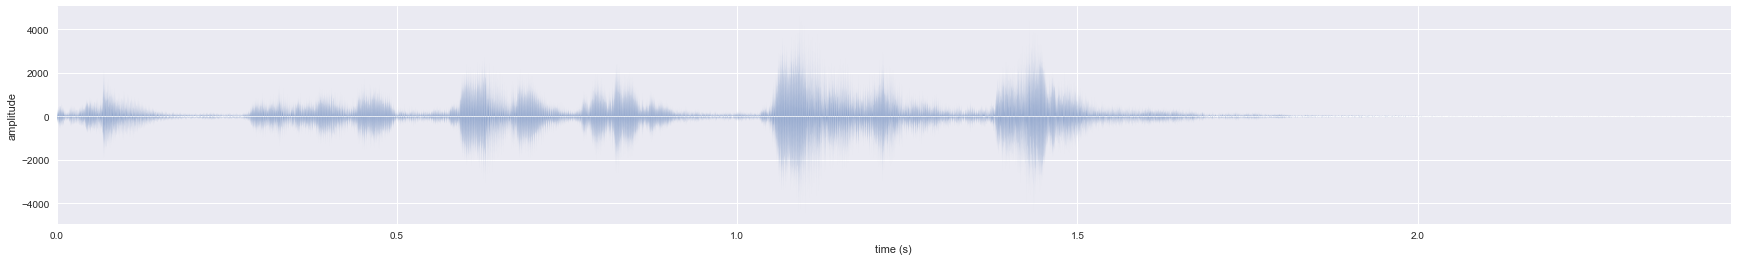

In [83]:
new_stft = phase_vocoder(stft, Fs, hop_synthesis, hop_analysis, phase_lock = "loose", init_alpha = False, beta = beta)

new_path = sub_part+'_'+str(alpha)+'_PVTSM_loose.wav'


inv_s = synthesis(new_stft, hop_synthesis = hop_synthesis, win_length = win_length)
save_plot_read(inv_s, new_path)



#### with alpha

loose


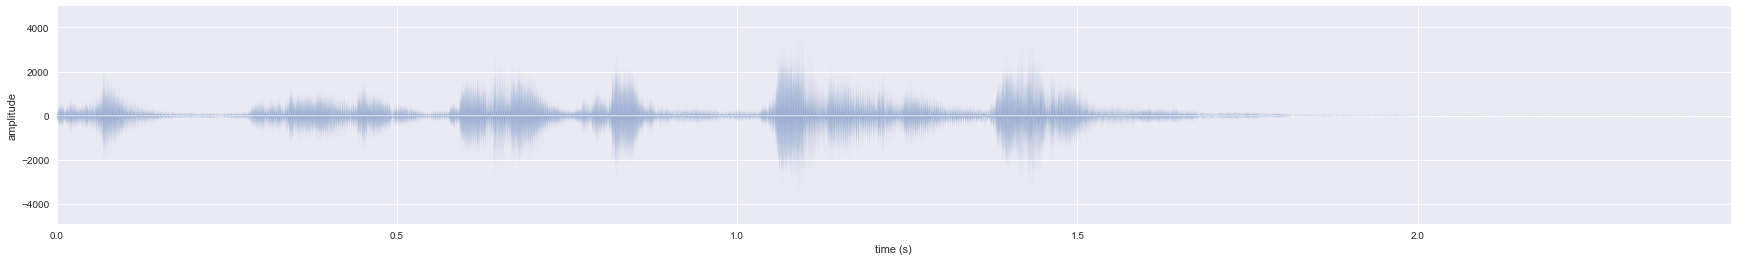

In [84]:
new_stft = phase_vocoder(stft, Fs, hop_synthesis, hop_analysis, phase_lock = "loose", init_alpha = True, beta = beta)

new_path = sub_part+'_'+str(alpha)+'_alphaInit_PVTSM_loose.wav'


inv_s = synthesis(new_stft, hop_synthesis = hop_synthesis, win_length = win_length)
save_plot_read(inv_s, new_path)



### PVTSM RIGID IDENTITY

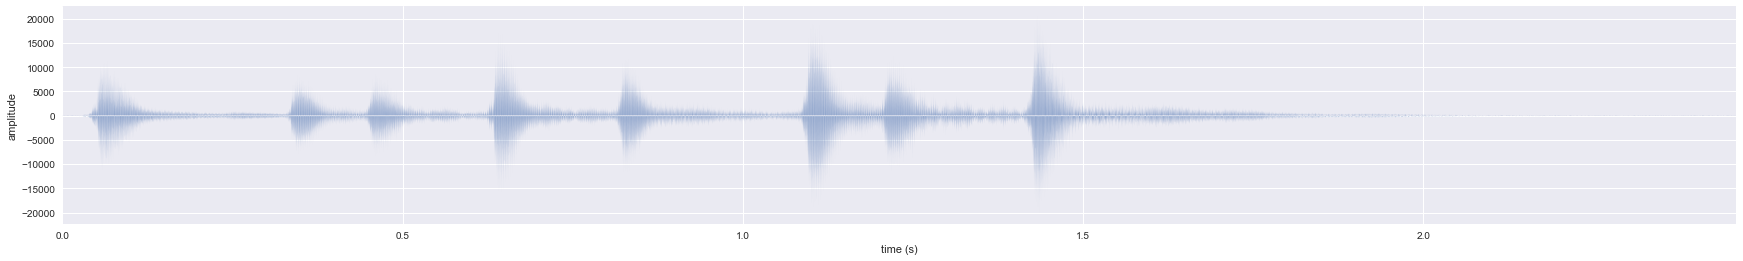

In [85]:
new_stft = phase_vocoder(stft, Fs, hop_synthesis, hop_analysis, phase_lock = "rigid_identity", init_alpha = False, beta = beta)

new_path = sub_part+'_'+str(alpha)+'_PVTSM_id.wav'


inv_s = synthesis(new_stft, hop_synthesis = hop_synthesis, win_length = win_length)
save_plot_read(inv_s, new_path)



#### with alpha

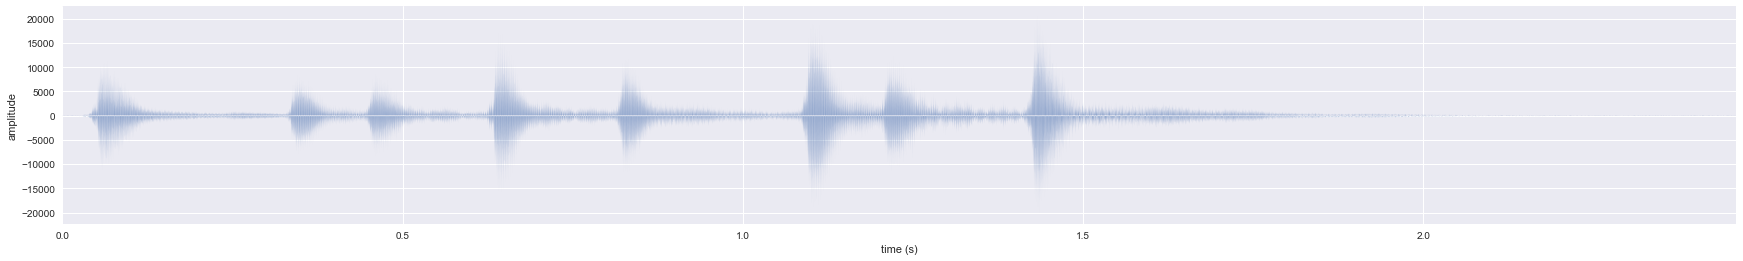

In [86]:
new_stft = phase_vocoder(stft, Fs, hop_synthesis, hop_analysis, phase_lock = "rigid_identity", init_alpha = False, beta = beta)

new_path = sub_part+'_'+str(alpha)+'_alphaInit_PVTSM_id.wav'


inv_s = synthesis(new_stft, hop_synthesis = hop_synthesis, win_length = win_length)
save_plot_read(inv_s, new_path)



### PVTSM RIGID SCALE 

In [87]:
beta = 2/3 + hop_synthesis/(hop_analysis*3)

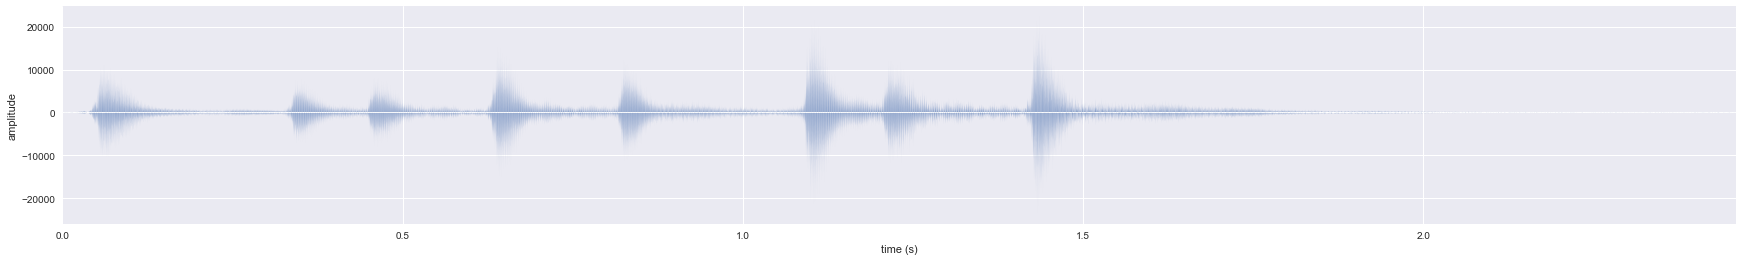

In [88]:
new_stft = phase_vocoder(stft, Fs, hop_synthesis, hop_analysis, phase_lock = "rigid_scale", init_alpha = False, beta = beta)

new_path = sub_part+'_'+str(alpha)+'_PVTSM_scale.wav'


inv_s = synthesis(new_stft, hop_synthesis = hop_synthesis, win_length = win_length)
save_plot_read(inv_s, new_path)



#### with alpha

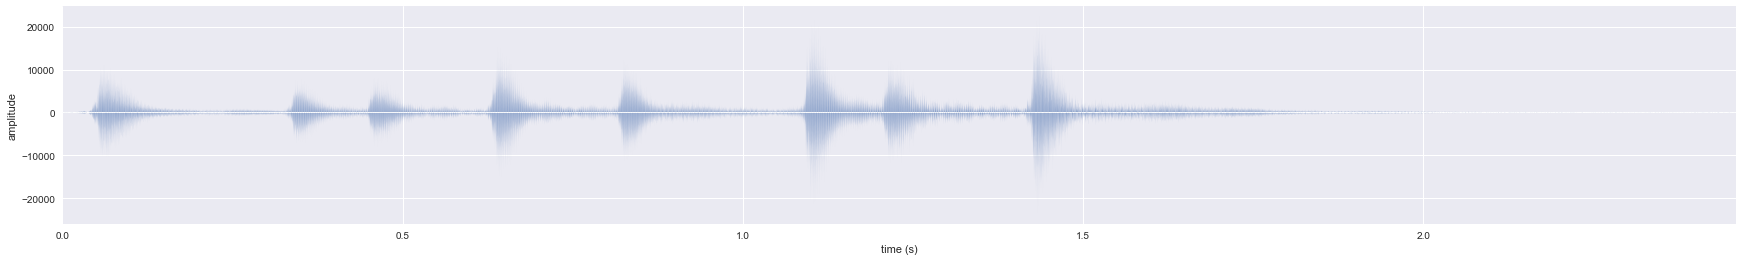

In [89]:
new_stft = phase_vocoder(stft, Fs, hop_synthesis, hop_analysis, phase_lock = "rigid_scale", init_alpha = False, beta = beta)

new_path = sub_part+'_'+str(alpha)+'_alphaInit_PVTSM_scale.wav'


inv_s = synthesis(new_stft, hop_synthesis = hop_synthesis, win_length = win_length)
save_plot_read(inv_s, new_path)

